<a href="https://colab.research.google.com/github/tgparkk/ML-math/blob/main/03-2%20LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [5]:
print(train_input)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [8]:
print(knr.predict([[50]]))

[1033.33333333]


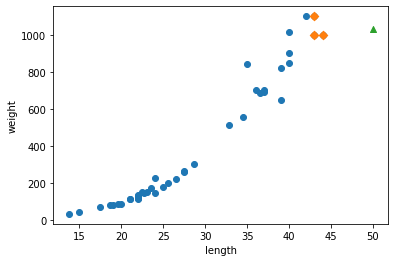

In [10]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
print(distances)

[[6. 7. 7.]]


In [13]:
print(indexes)

[[34  8 14]]


In [16]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [17]:
print(knr.predict([[100]]))

[1033.33333333]


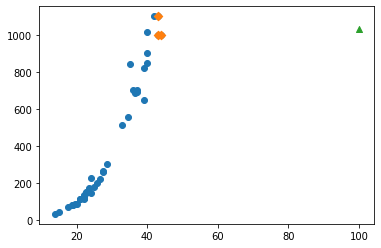

In [19]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(100, 1033, marker='^')

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [21]:
print(lr.coef_, lr.intercept_) # 기울기, x절편

[39.01714496] -709.0186449535477


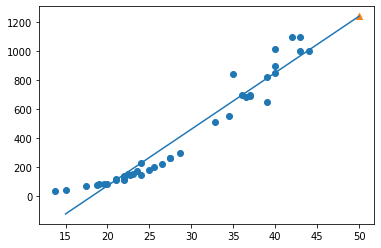

In [23]:
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')

In [24]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [30]:
print(test_target[0])

5.9


In [31]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [32]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [34]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [35]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [36]:
# [  1.01433211 -21.55792498] 116.0502107827827
# 무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05

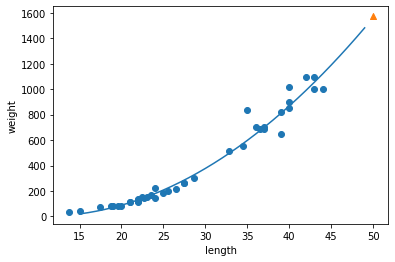

In [37]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
  print(lr.score(train_poly, train_target))
  print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [39]:
# 여전히 테스트의 점수가 더 높으므로 과소접합이죠.